# Analysis of the UC post-census data by race
Antoine Islegen-Wojdyla, November 2024
https://github.com/awojdyla/

Initial report from 2019:
- https://www.pewresearch.org/short-reads/2019/07/30/most-common-age-among-us-racial-ethnic-groups/

The data comes from here:
- https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-detail.html

Here's an explanation of the data:
- https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2020-2023/NC-EST2023-ALLDATA.pdf


## Loading the data
I'm not very familiar with panda, but we'll try for the time being because importing the data column by column in numpy would be tough

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Read the CSV file using pandas
file_path = 'census_data/nc-est2023-alldata-r-file10.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_32328/44920862.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,R,7,2024,999,336673595,166586588,170087007,125849691,126758056,22181467,...,30108194,29431864,2280732,2327391,1544185,1460984,664259,660409,231696,222658
1,R,7,2024,0,3650892,1865430,1785462,1287485,1228521,302642,...,436609,421380,52686,50944,30436,29280,16028,15167,5688,5281
2,R,7,2024,1,3670117,1875086,1795031,1291894,1232471,303668,...,440525,425014,53090,51310,30848,29745,16088,15267,5697,5311
3,R,7,2024,2,3715603,1898133,1817470,1305295,1245239,306669,...,446450,430681,53904,52033,31567,30428,16334,15537,5753,5412
4,R,7,2024,3,3632648,1857513,1775135,1271527,1209928,304450,...,431934,416525,51875,50114,30831,29717,15760,15181,5276,4973


### playing with the data a little bit 
the AGE column has an entry 999 which is the overall population for a group

In [2]:
data_2024_august = data[(data['YEAR'] == 2024) & (data['MONTH'] == 8) &(data['AGE'] != 999)]
data_2024_august.head()

,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
103,R,8,2024,0,3650896,1865430,1785466,1287479,1228519,302646,...,436596,421375,52683,50943,30436,29280,16026,15168,5687,5278
104,R,8,2024,1,3670332,1875182,1795150,1291943,1232542,303695,...,440523,425019,53091,51311,30855,29746,16090,15267,5697,5312
105,R,8,2024,2,3711091,1895772,1815319,1303680,1243762,306295,...,446230,430510,53830,51967,31520,30380,16314,15518,5740,5404
106,R,8,2024,3,3643470,1862736,1780734,1275568,1214426,304791,...,433425,418225,52214,50414,30967,29848,15826,15220,5353,5021
107,R,8,2024,4,3758303,1920882,1837421,1325134,1264433,305408,...,437941,421068,50251,48173,31290,29782,15805,15039,5059,4860


### Plotting the data with matplotlib
pandas is actually pretty nice if everything is labeled.
For now, I will only select the white population, and plot it for men and total population, to see if this makes sense

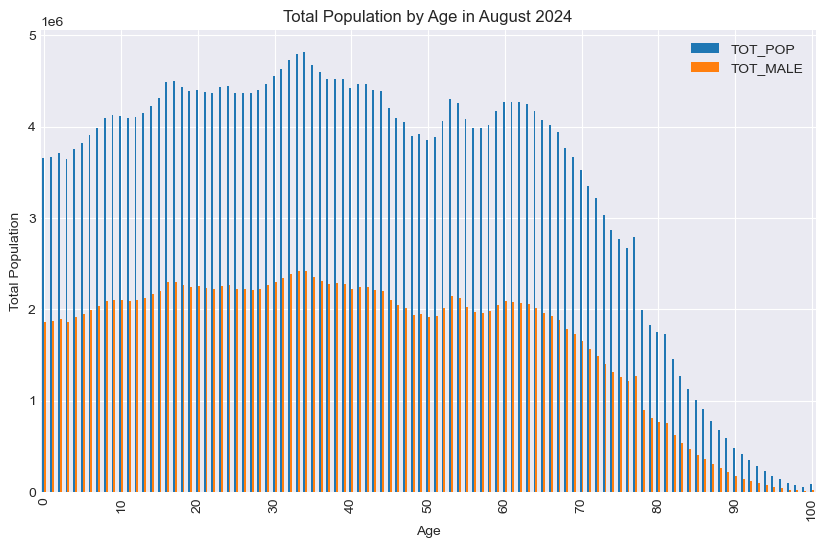

In [3]:


# Plot the total population for each age group in August 2024
ax = data_2024_august.plot(x='AGE', y=['TOT_POP','TOT_MALE'], kind='bar', figsize=(10, 6))

plt.title('Total Population by Age in August 2024')
plt.xlabel('Age')
plt.ylabel('Total Population')

# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(data_2024_august['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(data_2024_august['AGE']) + 1, 10))

plt.show()

### Plot the total population for each age group in August 2024
Here we'll use some pandas magic to do the work for us.

Data entries are the following:
- TOT_POP Total population
- TOT_MALE Total male population
- TOT_FEMALE Total female population
- WA_MALE White alone male population
- WA_FEMALE White alone female population
- BA_MALE Black or African American alone male population
- BA_FEMALE Black or African American alone female population
- IA_MALE American Indian and Alaska Native alone male population
- IA_FEMALE American Indian and Alaska Native alone female population
- AA_MALE Asian alone male population
- AA_FEMALE Asian alone female population
- NA_MALE Native Hawaiian and Other Pacific Islander alone male population
- NA_FEMALE Native Hawaiian and Other Pacific Islander alone female population
- TOM_MALE Two or More Races male population
- TOM_FEMALE Two or More Races female population
- NHWA_MALE Not Hispanic, White alone male population
- NHWA_FEMALE Not Hispanic, White alone female population
- HWA_MALE Hispanic, White alone male population
- HWA_FEMALE Hispanic, White alone female population

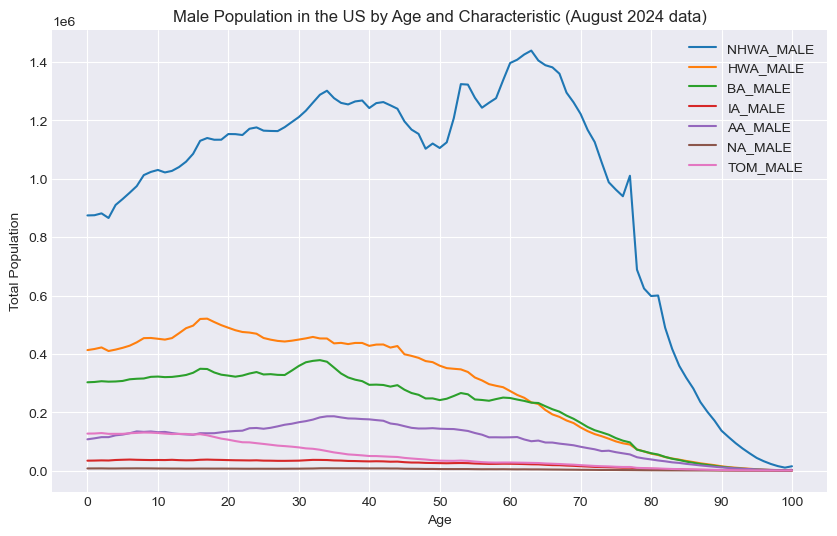

In [4]:
ax = data_2024_august.plot(x='AGE', y=['NHWA_MALE', 'HWA_MALE', 'BA_MALE', 'IA_MALE','AA_MALE', 'NA_MALE','TOM_MALE'], kind='line', figsize=(10, 6))

plt.title('Male Population in the US by Age and Characteristic (August 2024 data)')
plt.xlabel('Age')
plt.ylabel('Total Population')

# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(data_2024_august['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(data_2024_august['AGE']) + 1, 10))
plt.show()

## Aggregating all the data
We have 10 files from 2020 to 2024 with data, so that we can follow the evolution of the population over time

In [5]:
import pandas as pd

# Read the CSV file using pandas
for i_f in range(1,11):
    file_path = '/Users/awojdyla/data/census_data/nc-est2023-alldata-r-file%02.0f.csv' %i_f
    data = pd.read_csv(file_path)
    if i_f ==1: 
        full_data = data
    else:
        full_data = pd.concat([full_data, data])
    # Display the first few rows of the dataframe
full_data.head()

,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,R,4.2,2020,999,331464948,164195953,167268995,125555812,126168157,21596149,...,28343554,27568750,2028165,2075315,1383920,1301582,594794,591993,208930,199738
1,R,4.2,2020,0,3734587,1908721,1825866,1327821,1267610,301100,...,426494,410712,48477,46760,29857,28582,15563,14822,5010,4742
2,R,4.2,2020,1,3777056,1929651,1847405,1343676,1283056,302128,...,431509,416881,48858,47200,29745,28387,15628,14916,5038,4773
3,R,4.2,2020,2,3873233,1981147,1892086,1377037,1312171,310111,...,443717,427041,47882,46429,30471,28649,15632,14943,5005,4815
4,R,4.2,2020,3,3966159,2029578,1936581,1418049,1348916,310541,...,455997,438231,48026,46253,28595,27910,15646,14896,4983,4834


### cleaning up the data

In [6]:
for i_m in range(4,60):
    year = 2019 + np.ceil((i_m+1)/12).astype(int)
    month = np.mod(i_m, 12)+1
    if i_m == 4:
        df = full_data[(full_data['YEAR'] == year) & (full_data['MONTH'] == month) &(full_data['AGE'] != 999)]
    else:
        df = pd.concat([df, full_data[(full_data['YEAR'] == year) & (full_data['MONTH'] == month) &(full_data['AGE'] != 999)]])
df.reset_index()
df.head()
#df.tail()


,UNIVERSE,MONTH,YEAR,AGE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
103,R,5.0,2020,0,3723579,1903324,1820255,1323087,1262901,300927,...,425779,409748,48518,46749,29815,28489,15532,14770,5002,4749
104,R,5.0,2020,1,3772296,1927009,1845287,1341264,1280970,302340,...,431724,417112,48907,47240,29793,28478,15668,14929,5054,4774
105,R,5.0,2020,2,3866268,1977240,1889028,1374011,1309690,309913,...,442488,426152,48005,46529,30527,28702,15592,14932,5001,4808
106,R,5.0,2020,3,3954657,2023690,1930967,1412859,1344150,310420,...,454632,437014,47952,46257,28643,27948,15634,14895,4981,4833
107,R,5.0,2020,4,4044889,2067270,1977619,1457749,1388750,312164,...,467604,449287,47261,45785,27905,26891,15769,14906,5065,4817


### Pairing male and female together

In [7]:
df['NHWA'] = df[['NHWA_MALE', 'NHWA_FEMALE']].sum(axis=1)
df['NHWA'].head()

103    1794605
104    1817733
105    1859743
106    1910360
107    1974983
Name: NHWA, dtype: int64

### same, but for all relevant populations

In [8]:
df['NHWA'] = df[['NHWA_MALE', 'NHWA_FEMALE']].sum(axis=1)
df['HWA']  = df[['HWA_MALE',  'HWA_FEMALE']].sum(axis=1)
df['BA'] = df[['BA_MALE', 'BA_FEMALE']].sum(axis=1)
df['IA'] = df[['IA_MALE', 'IA_FEMALE']].sum(axis=1)
df['AA'] = df[['AA_MALE', 'AA_FEMALE']].sum(axis=1)
df['NA'] = df[['NA_MALE', 'NA_FEMALE']].sum(axis=1)
df['TOM'] = df[['TOM_MALE', 'TOM_FEMALE']].sum(axis=1)

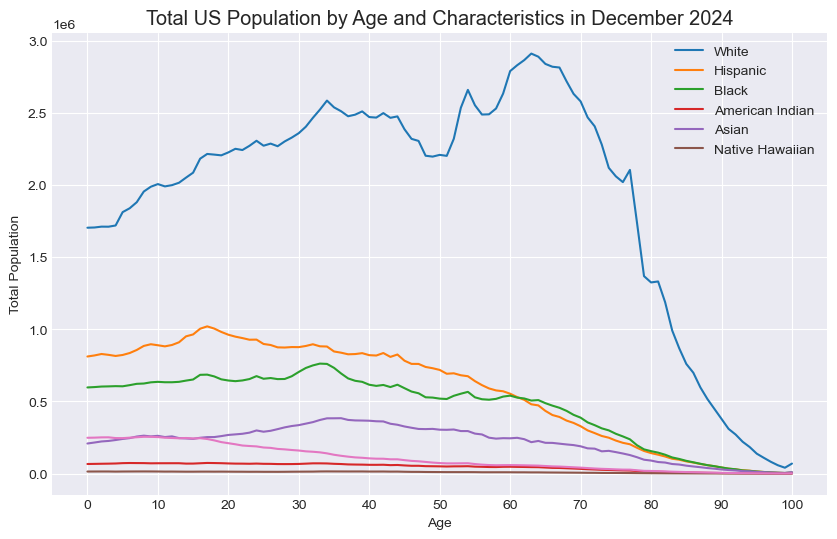

In [9]:
# Plot the total population for each age group in August 2024
ax = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)].plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA','AA', 'NA','TOM'], kind='line', figsize=(10, 6))

plt.style.use('ggplot')

plt.title('Total US Population by Age and Characteristics in December 2024')
plt.xlabel('Age')
plt.ylabel('Total Population')
plt.legend(['White', 'Hispanic', 'Black', 'American Indian', 'Asian', 'Native Hawaiian'])


# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(df['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(df['AGE']) + 1, 10))
plt.show()

## Differences
We're not looking at how the population changes year on year

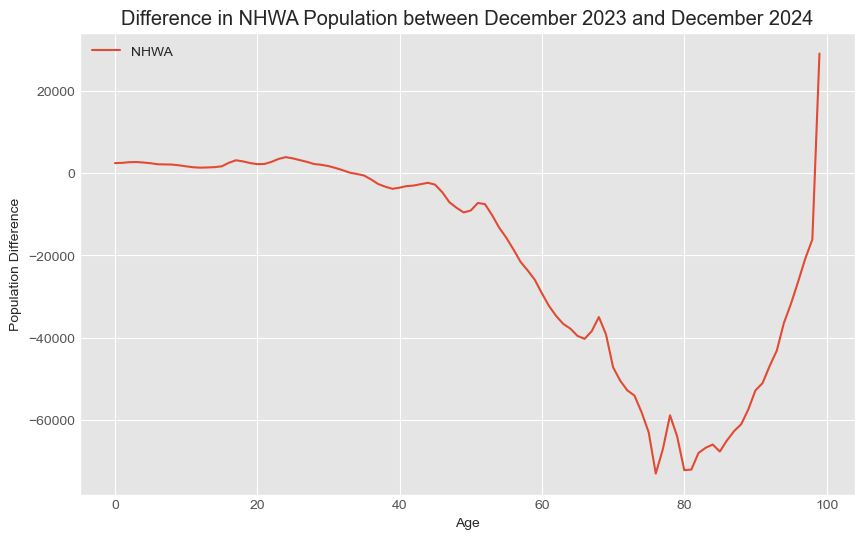

In [10]:
date_n = df[(df['YEAR'] == 2023) & (df['MONTH'] == 12)]
date_np = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)]

date_n[['AGE', 'NHWA']].set_index('AGE')
date_n.index = np.arange(1, len(date_n)+1)
date_np[['AGE', 'NHWA']].set_index('AGE')
date_np.index = np.arange(0, len(date_np)+0)

diff = date_np[['AGE', 'NHWA']] - date_n[['AGE', 'NHWA']]
diff['AGE'] = date_n['AGE']
ax = diff.plot(x='AGE', y='NHWA', kind='line', figsize=(10, 6))  
plt.title('Difference in NHWA Population between December 2023 and December 2024')
plt.xlabel('Age')
plt.ylabel('Population Difference')
plt.show()


### Change accross all characteristics
Now the same for all populations

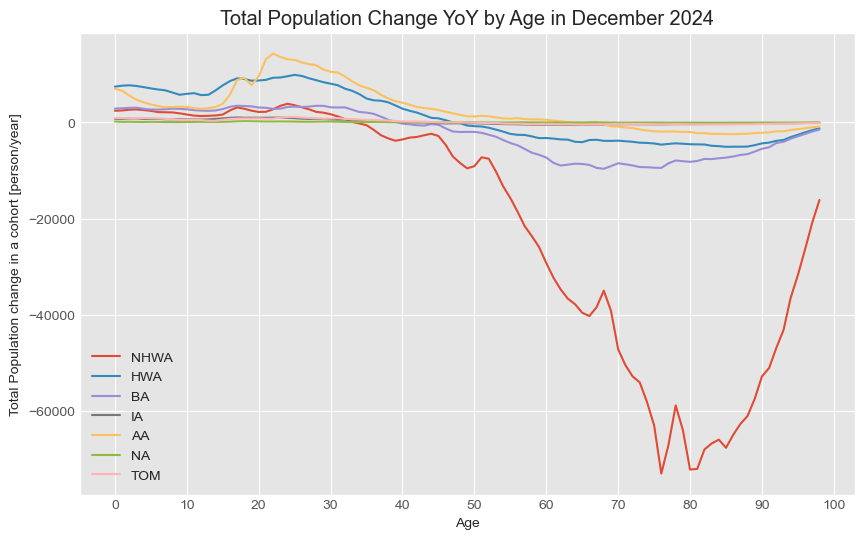

In [11]:
date_n = df[(df['YEAR'] == 2023) & (df['MONTH'] == 12)]
date_np = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)]

date_n.set_index('AGE')
date_n.index = np.arange(1, len(date_n)+1)
date_np.set_index('AGE')
date_np.index = np.arange(0, len(date_np)+0)

numeric_cols = date_np.select_dtypes(include=[np.number]).columns
diff = date_np[numeric_cols] - date_n[numeric_cols]
diff['AGE'] = date_n['AGE']
diff.drop(index=[0,100,101], inplace=True)

# Plot the total population for each age group in August 2024
ax = diff.plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA','AA', 'NA','TOM'], kind='line', figsize=(10, 6))

plt.title('Total Population Change YoY by Age in December 2024')
plt.xlabel('Age')
plt.ylabel('Total Population change in a cohort [person/year]')

# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(df['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(df['AGE']) + 1, 10))
plt.show()



## Rates of change
Here we inadvertently build actuarial tables for all populations.

The are not actuarial tables since they include immigration

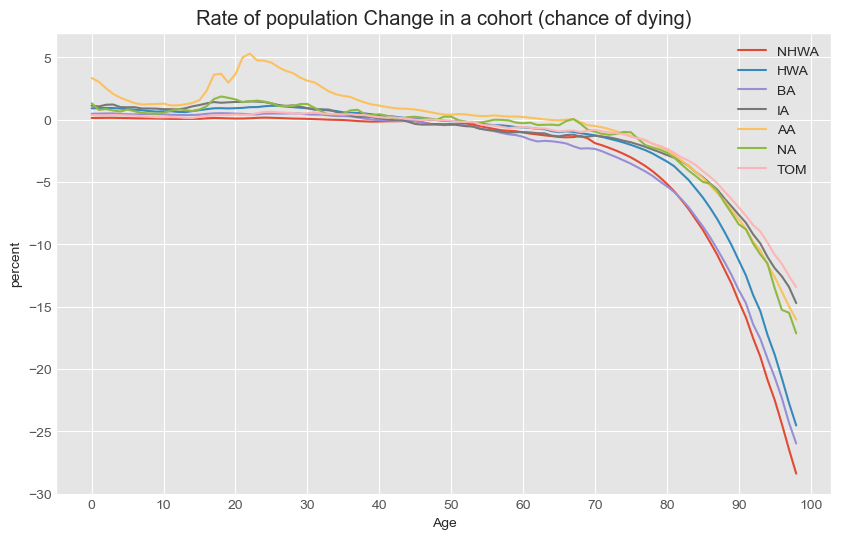

In [12]:
date_n = df[(df['YEAR'] == 2023) & (df['MONTH'] == 12)]
date_np = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)]

date_n.set_index('AGE')
date_n.index = np.arange(1, len(date_n)+1)
date_np.set_index('AGE')
date_np.index = np.arange(0, len(date_np)+0)

numeric_cols = date_np.select_dtypes(include=[np.number]).columns
diff = (date_np[numeric_cols] - date_n[numeric_cols])/date_n[numeric_cols]*100
diff['AGE'] = date_n['AGE']
diff.drop(index=[0,100,101], inplace=True)

# Plot the total population for each age group in August 2024
ax = diff.plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA','AA', 'NA','TOM'], kind='line', figsize=(10, 6))

plt.title('Rate of population Change in a cohort (chance of dying)')
plt.xlabel('Age')
plt.ylabel('percent')

# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(df['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(df['AGE']) + 1, 10))
plt.show()

## Projections
Now that we have rate estimates, we can project population estimate beyond 2025

(note: the initial data after 2023 is already an estimate)


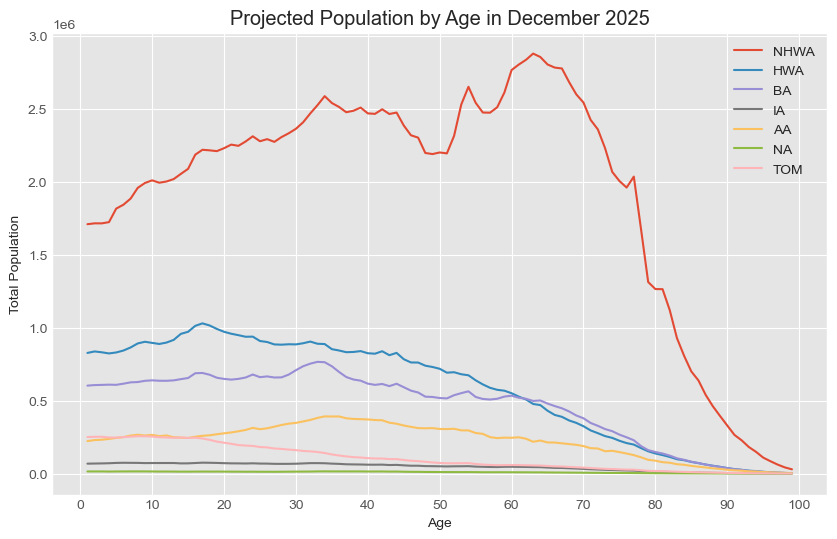

In [13]:
current = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)].copy(deep=True)
current.index = np.arange(0, len(current)+0)
current.head()

numeric_cols = current.select_dtypes(include=[np.number]).columns
proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
proj['AGE'] = current['AGE']

# Plot the projected population for each age group
ax = proj.plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA', 'AA', 'NA', 'TOM'], kind='line', figsize=(10, 6))

plt.title('Projected Population by Age in December 2025')
plt.xlabel('Age')
plt.ylabel('Total Population')

# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(proj['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(proj['AGE']) + 1, 10))

plt.show()

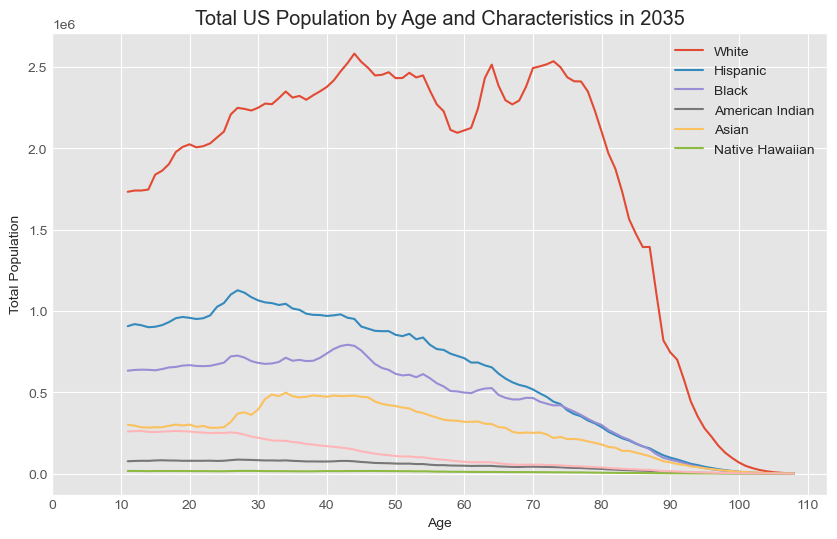

In [14]:
# iterate
current = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)].copy()
current.index = np.arange(0, len(date_np)+0)
proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
proj['AGE'] = current['AGE']

for i_y in range(10):
    current = proj.copy()
    current.index = np.arange(1, len(current)+1)
    numeric_cols = current.select_dtypes(include=[np.number]).columns
    proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
    proj['AGE'] = current['AGE']+1

# Plot the projected population for each age group
ax = proj.plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA', 'AA', 'NA', 'TOM'], kind='line', figsize=(10, 6))
plt.title('Total US Population by Age and Characteristics in %i' % (2024+i_y+2))
plt.xlabel('Age')
plt.ylabel('Total Population')
# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(proj['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(proj['AGE']) + 1, 10))
plt.legend(['White', 'Hispanic', 'Black', 'American Indian', 'Asian', 'Native Hawaiian'])
plt.show()

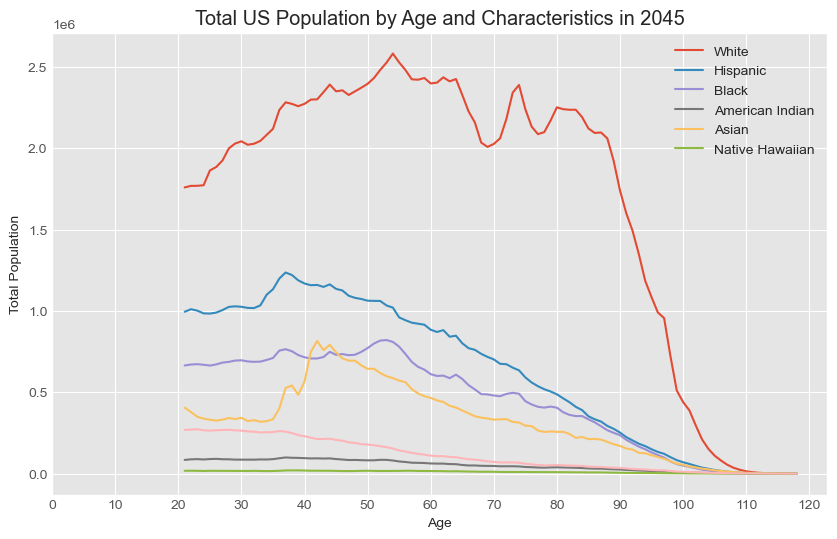

In [15]:
# iterate
current = df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)].copy()
current.index = np.arange(0, len(date_np)+0)
proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
proj['AGE'] = current['AGE']

for i_y in range(20):
    current = proj.copy()
    current.index = np.arange(1, len(current)+1)
    numeric_cols = current.select_dtypes(include=[np.number]).columns
    proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
    proj['AGE'] = current['AGE']+1

# Plot the projected population for each age group
ax = proj.plot(x='AGE', y=['NHWA', 'HWA', 'BA', 'IA', 'AA', 'NA', 'TOM'], kind='line', figsize=(10, 6))
plt.title('Total US Population by Age and Characteristics in %i' % (2024+i_y+2))
plt.xlabel('Age')
plt.ylabel('Total Population')
plt.legend(['White', 'Hispanic', 'Black', 'American Indian', 'Asian', 'Native Hawaiian'])
# Set x-axis ticks and labels to increments of 10
ax.set_xticks(range(0, max(proj['AGE']) + 1, 10))
ax.set_xticklabels(range(0, max(proj['AGE']) + 1, 10))
plt.show()

In [16]:
# from matplotlib.animation import FuncAnimation

# # Create a figure and axis
# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = plt.plot([], [], 'r-')

# # Set up the plot limits
# ax.set_xlim(0, max(current['AGE']))
# #ax.set_ylim((0, max(proj['NHWA'])))

# # Initialize the data
# def init():
#     ln.set_data([], [])
#     return ln,

# # Update the data for each frame
# def update(frame):
#     current = proj.copy()
#     current.index = np.arange(1, len(current)+1)
#     numeric_cols = current.select_dtypes(include=[np.number]).columns
#     proj = diff[numeric_cols]/100*current[numeric_cols] + current[numeric_cols]
#     proj['AGE'] = current['AGE']
#     xdata.append(proj['AGE'])
#     ydata.append(proj['NHWA', 'HWA', 'BA', 'IA', 'AA', 'NA', 'TOM'])
#     ln.set_data(xdata, ydata)
#     return ln,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 128),
#                     init_func=init, blit=True)

# # Display the animation
# plt.show()

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Create a figure and axis
# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = plt.plot([], [], 'r-')

# # Set up the plot limits
# ax.set_xlim(0, 2 * np.pi)
# ax.set_ylim(-1, 1)

# # Initialize the data
# def init():
#     ln.set_data([], [])
#     return ln,

# # Update the data for each frame
# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=np.linspace(0, 2 * np.pi, 128),
#                     init_func=init, blit=True)

# # Display the animation
# plt.show()

## Playing with animations

In [18]:
# import plotly.graph_objs as go
# import numpy as np

# fig = go.Figure(
#     data=[go.Scatter(x=df[(df['YEAR'] == 2020) & (df['MONTH'] == 5)]['AGE'], y=df[(df['YEAR'] == 2020) & (df['MONTH'] == 5)]['NHWA'], mode="lines")],
#     layout=go.Layout(
#         #xaxis=dict(df['AGE']),
#         #yaxis=dict(df['AGE']),
#         title="Demographic Evolution",
#         updatemenus=[dict(type="buttons", showactive=False,
#                           buttons=[dict(label="Play",
#                                         method="animate",
#                                         args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])]
#     ),
#     frames=[go.Frame(data=[go.Scatter(x=df[(df['YEAR'] == 2024) & (df['MONTH'] == 12)]['AGE'], 
#                                       y=df[(df['YEAR'] == (2019 + np.ceil((i_m+1)/12).astype(int))) & (df['MONTH'] == (np.mod(i_m, 12)+1))]['NHWA'])]) for i in range(4,60)]
# )

# fig.show()

In [19]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)

# # Use a style
# plt.style.use('seaborn-darkgrid')

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot data
# ax.plot(x, y1, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Sine')
# ax.plot(x, y2, color='red', marker='x', linestyle='--', linewidth=2, markersize=6, label='Cosine')

# # Add labels and title
# ax.set_xlabel('X-axis Label', fontsize=14)
# ax.set_ylabel('Y-axis Label', fontsize=14)
# ax.set_title('Improved Matplotlib Plot', fontsize=16)

# # Customize ticks
# ax.tick_params(axis='both', which='major', labelsize=12)

# # Add grid
# ax.grid(True)

# # Add legend
# ax.legend(loc='best', fontsize=12)

# # Add annotations
# ax.annotate('Max Sine', xy=(np.pi/2, 1), xytext=(np.pi/2+1, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05))
# ax.annotate('Min Cosine', xy=(np.pi, -1), xytext=(np.pi+1, -1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05))

# # Save the figure
# plt.savefig('improved_plot.png', dpi=300, bbox_inches='tight')

# # Show the plot
# plt.show()